In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('data/clean/train_clean_v2.csv')
df_targets = pd.read_csv('data/clean/train_labels.csv')
df.head()

,fecha_dato,fecha_dato_year,fecha_dato_month,fecha_dato_day,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,...,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2015-01-28,2015,1,28,1375586,1,1,1,35,2015-01-12,...,2,1,20,1,1.0,29.0,7,1.0,87218.10,1
1,2015-01-28,2015,1,28,1050611,1,1,1,23,2012-08-10,...,2,2,1,1,1.0,13.0,23,0.0,35548.74,2
2,2015-01-28,2015,1,28,1050612,1,1,1,23,2012-08-10,...,2,1,1,1,1.0,13.0,23,0.0,122179.11,2
3,2015-01-28,2015,1,28,1050613,1,1,1,22,2012-08-10,...,2,1,7,1,1.0,50.0,6,0.0,119775.54,2
4,2015-01-28,2015,1,28,1050615,1,1,1,23,2012-08-10,...,2,1,1,1,1.0,45.0,16,0.0,22220.04,2


In [4]:
df_copy = df.copy()

In [5]:
df.shape, df_targets.shape

((10795392, 27), (10795392, 24))

In [6]:
x = df_copy.drop(['fecha_dato', 'fecha_alta', 'ncodpers'], axis=1).as_matrix()
y = df_targets.as_matrix()
print('Tamaño de datasets', x.shape, y.shape)

Tamaño de datasets (10795392, 24) (10795392, 24)


In [113]:
def metrics(x_train, y_train, x_test, y_test, clf):
    
    #INPUTS
    #x_train: data to train
    #y_train: target, one column
    #x_test: data to test
    #y_test: target to test, one column
    #clf: classifier
    
    clf.fit(x_train, y_train)
    preds = [clf.predict(row.reshape(1, -1))[0] for row in x_test]
    
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    sensitivity = tp / (tp + fn)
    specifity = tn / (tn + fp)
    
    #OUTPUTS
    #preds (list): predictions for each row
    #tn: true negative
    #fp: false positive
    #fn: false negative
    #tp: true positive
    return tn, fp, fn, tp, sensitivity, specifity

### Cálculo de métricas tales como True Positive Rate, True Negative Rate, y otros.

In [10]:
x_train = x[:10094948]
x_test = x[10094948:]
y_train = y[:10094948]
y_test = y[10094948:]

In [119]:
%%time
rf = RandomForestClassifier()
tn, fp, fn, tp, sensitivity, specifity = metrics(x_train, y_train[:, 1], x_test, y_test[:, 1], rf)
print(df_targets.columns[1])
print('True positive:', tp)
print('False positive:', fp)
print('True positive rate or sensitivity:', sensitivity)
print('True negative:', tn)
print('False negative:', fn)
print('True negative rate or specifity:', specifity)
print()

ind_aval_fin_ult1
True positive: 6
False positive: 1
True positive rate or sensitivity: 0.428571428571
True negative: 700429
False negative: 8
True negative rate or specifity: 0.999998572306

CPU times: user 19min 46s, sys: 6.1 s, total: 19min 52s
Wall time: 19min 51s


### Matriz de correlación

In [17]:
corr = df_copy.drop(['fecha_dato', 'fecha_alta', 'ncodpers'], axis=1).corr().dropna(how='all', axis=1).dropna(how='all', axis=0)
corr.shape

(21, 21)

In [18]:
corr_mat = corr.as_matrix()

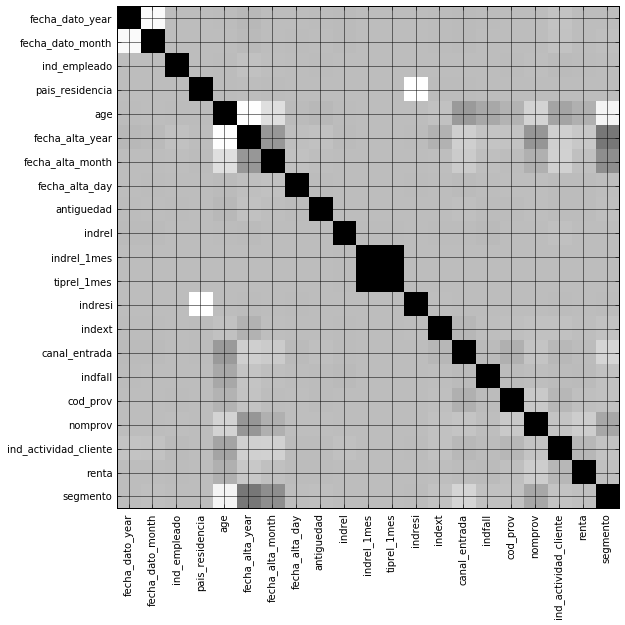

In [19]:
plt.figure(figsize=(9,9))
plt.imshow(corr_mat, cmap=plt.cm.Greys, interpolation='nearest')
plt.yticks(range(len(corr_mat)), corr.columns)
plt.xticks(range(len(corr_mat)), corr.columns, rotation='vertical');
plt.grid(linestyle='-')

In [21]:
corr['fecha_alta_year']

fecha_dato_year          0.021283
fecha_dato_month         0.013562
ind_empleado            -0.030828
pais_residencia         -0.002388
age                     -0.589750
fecha_alta_year          1.000000
fecha_alta_month         0.188755
fecha_alta_day          -0.016187
antiguedad              -0.034024
indrel                   0.010823
indrel_1mes             -0.000069
tiprel_1mes             -0.000069
indresi                  0.004044
indext                   0.050727
canal_entrada           -0.127116
indfall                 -0.052644
cod_prov                -0.043690
nomprov                  0.194805
ind_actividad_cliente   -0.141769
renta                   -0.083357
segmento                 0.370418
Name: fecha_alta_year, dtype: float64

## Tareas
#### Revisar los registros de los dos últimos meses

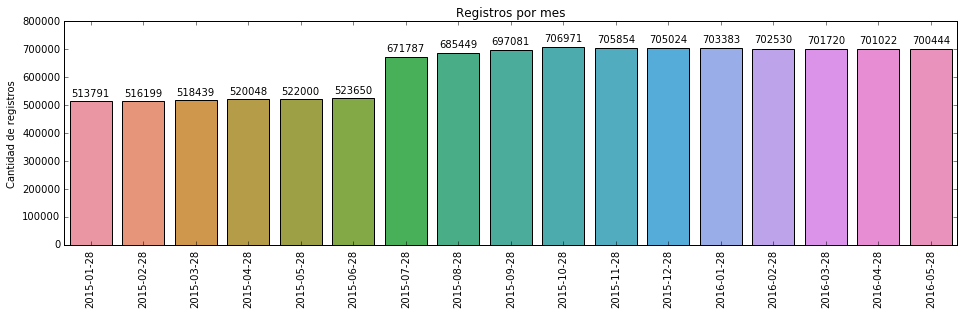

In [7]:
dates = df_copy.fecha_dato.value_counts().sort_index()
fecha_dato = dates.index
count_dates = dates.values

plt.figure(figsize=(16,4))
sns.barplot(fecha_dato, count_dates)
#plt.plot(count_dates, 'bo', count_dates, '-')

plt.xticks(range(len(fecha_dato)), fecha_dato, rotation='vertical')
plt.title('Registros por mes')
plt.ylabel('Cantidad de registros')

for i, count in enumerate(count_dates):
    plt.text(i, count*1.02, count, ha='center', va='bottom')

In [9]:
shift = dates[np.sort(fecha_dato)[-2:]][1] - dates[np.sort(fecha_dato)[-2:]][0]
sent = -shift if shift < 0 else shift
print('En los últimos dos meses hay una diferencia de', sent, 'clientes')

En los últimos dos meses hay una diferencia de 578 clientes


In [11]:
groupby_fecha_dato = df_copy.groupby(['fecha_dato'])
groups_fecha_dato = groupby_fecha_dato.groups

In [22]:
sorted(groups_fecha_dato.keys())[-2:]

['2016-04-28', '2016-05-28']

In [21]:
#Los indíces del dataset de los dos útimos meses
last_two_months = [groups_fecha_dato[i] for i in sorted(groups_fecha_dato.keys())[-2:]]
len(last_two_months[0]), len(last_two_months[1])

(701022, 700444)

In [149]:
sorted_dates = sorted(groups_fecha_dato.keys())

str_format = "{:<15}|"*3 + "{:<15} {:<5}"
print(str_format.format('Fecha', 'Salidas', 'Nuevos', 'Diferencia', ''))
print('-'*75)

for i in range(len(sorted_dates)-1):
    month_one = set(df['ncodpers'][groups_fecha_dato[sorted_dates[i]]].values)
    month_two = set(df['ncodpers'][groups_fecha_dato[sorted_dates[i+1]]].values)
    
    departures = len(month_one - month_two)
    new = len(month_two - month_one)
    diff = -(departures - new) if (departures - new) < 0 else departures - new
    sent = 'sube ^' if (departures - new) < 0 else 'baja v'
    
    print(str_format.format(sorted_dates[i], departures, new, diff, sent))

Fecha          |Salidas        |Nuevos         |Diferencia           
---------------------------------------------------------------------------
2015-01-28     |1118           |3526           |2408            sube ^
2015-02-28     |1114           |3354           |2240            sube ^
2015-03-28     |1353           |2962           |1609            sube ^
2015-04-28     |1151           |3103           |1952            sube ^
2015-05-28     |1280           |2930           |1650            sube ^
2015-06-28     |0              |148137         |148137          sube ^
2015-07-28     |23             |13685          |13662           sube ^
2015-08-28     |25             |11657          |11632           sube ^
2015-09-28     |418            |10308          |9890            sube ^
2015-10-28     |1143           |26             |1117            baja v
2015-11-28     |869            |39             |830             baja v
2015-12-28     |1687           |46             |1641            baja v
20

Comparación de la cantidad de registros entre meses

In [ ]:
groupby_ncodpers = df_copy.groupby(['ncodpers'])

In [152]:
penultimate_month = np.sort(df_copy['ncodpers'][groups_fecha_dato[sorted_dates[-2]]].values)
last_month = np.sort(df_copy['ncodpers'][groups_fecha_dato[sorted_dates[-1]]].values)
print(penultimate_month.shape, last_month.shape)

set_penultimate_month = set(list(penultimate_month))
set_last_month = set(list(last_month))

print(len(set_last_month - set_penultimate_month), len(set_penultimate_month - set_last_month))
list(set_last_month - set_penultimate_month)[:10]

(701022,) (700444,)
60 638


[1094276,
 802181,
 1369095,
 338185,
 1137929,
 796044,
 1423501,
 54542,
 792719,
 1240337]